In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
data.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
print(data['Gender'].unique())

['Male' 'Female']


In [11]:
data = data.drop(['CustomerID','Age'],axis=1)

In [12]:
data.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40


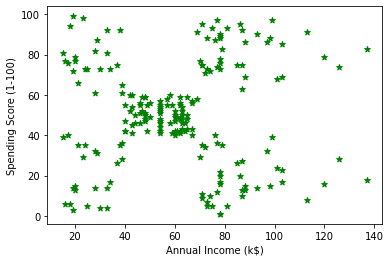

In [13]:
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='green' , marker="*" )

In [14]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km =KMeans(n_clusters = k) 
    km.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
sse  # sum of square error

[269981.28000000014,
 181665.82312925166,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25061.304119069322,
 21818.11458845217,
 19669.301557148287]

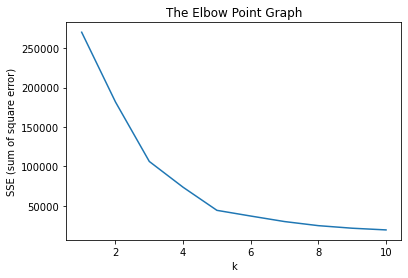

In [16]:
# Elbow Technique

plt.title('The Elbow Point Graph')
plt.xlabel('k')
plt.ylabel('SSE (sum of square error)')
plt.plot(k_rng,sse)

In [17]:
# optimal k value is = 5

In [18]:
scalar =  MinMaxScaler()
scalar.fit(data[['Annual Income (k$)']])
data['Annual Income (k$)'] = scalar.transform(data[['Annual Income (k$)']])

scalar.fit(data[['Spending Score (1-100)']])
data['Spending Score (1-100)'] = scalar.transform(data[['Spending Score (1-100)']])

In [19]:
data.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,0.000000,0.387755
1,Male,0.000000,0.816327
2,Female,0.008197,0.051020
3,Female,0.008197,0.775510
4,Female,0.016393,0.397959


In [20]:
km = KMeans(n_clusters = 5)
km

KMeans(n_clusters=5)

In [21]:
y_predict = km.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
y_predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [22]:
data['cluster']= y_predict
data

,Gender,Annual Income (k$),Spending Score (1-100),cluster
0,Male,0.000000,0.387755,3
1,Male,0.000000,0.816327,0
2,Female,0.008197,0.051020,3
3,Female,0.008197,0.775510,0
4,Female,0.016393,0.397959,3
...,...,...,...,...
195,Female,0.860656,0.795918,2
196,Female,0.909836,0.275510,4
197,Male,0.909836,0.744898,2
198,Male,1.000000,0.173469,4


In [23]:
km.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149]])

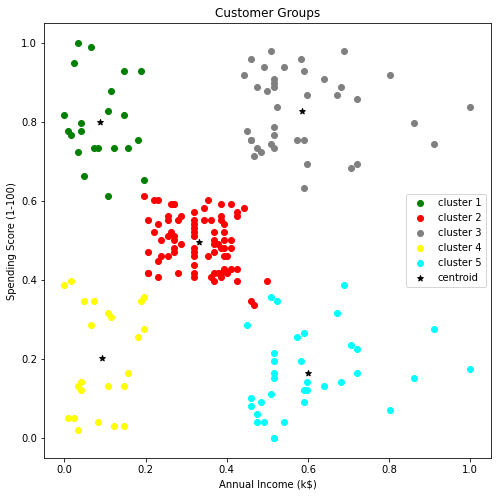

In [24]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]
df3 = data[data.cluster == 3]
df4 = data[data.cluster == 4]

plt.figure(figsize=(8,8))
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'], color = 'green', label="cluster 1")
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color = 'red' , label="cluster 2")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color = 'gray' , label="cluster 3")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color = 'yellow', label="cluster 4")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color = 'cyan', label="cluster 5")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1] , color='black', marker="*", label="centroid")

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()